In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
from tensorflow.keras.models import Sequential
data=pd.read_csv("/content/drive/MyDrive/DEEP LEARNNING/av35.csv")

In [41]:
data.shape

(327, 22)

In [42]:
X=data.drop('label',axis=1)
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((294, 21), (294,), (33, 21), (33,))

In [43]:
# Convert DataFrame to NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [44]:
X_train.shape[1]

21

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import Dropout
model = Sequential()
model.add(Conv1D(filters=500, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 17, 500)           3000      
                                                                 
 conv1d_21 (Conv1D)          (None, 13, 128)           320128    
                                                                 
 conv1d_22 (Conv1D)          (None, 9, 64)             41024     
                                                                 
 conv1d_23 (Conv1D)          (None, 5, 32)             10272     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1, 32)             0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                      

In [57]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"],)


model_history = model.fit(X_train,y_train, epochs=700, validation_data=(X_test,y_test),batch_size=32)

Epoch 1/700
10/10 [==============================] - 7s 64ms/step - loss: 0.5876 - accuracy: 0.6565 - val_loss: 0.6664 - val_accuracy: 0.6061
Epoch 2/700
10/10 [==============================] - 0s 43ms/step - loss: 0.5788 - accuracy: 0.6973 - val_loss: 0.6825 - val_accuracy: 0.6364
Epoch 3/700
10/10 [==============================] - 0s 40ms/step - loss: 0.5502 - accuracy: 0.7177 - val_loss: 0.6883 - val_accuracy: 0.6667
Epoch 4/700
10/10 [==============================] - 0s 41ms/step - loss: 0.5744 - accuracy: 0.6837 - val_loss: 0.6773 - val_accuracy: 0.6364
Epoch 5/700
10/10 [==============================] - 0s 40ms/step - loss: 0.5923 - accuracy: 0.6667 - val_loss: 0.6301 - val_accuracy: 0.6061
Epoch 6/700
10/10 [==============================] - 0s 39ms/step - loss: 0.5810 - accuracy: 0.7041 - val_loss: 0.6229 - val_accuracy: 0.6364
Epoch 7/700
10/10 [==============================] - 0s 40ms/step - loss: 0.5644 - accuracy: 0.7007 - val_loss: 0.6844 - val_accuracy: 0.6364
Epoch 

In [47]:
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.round(predictions).astype(int)

# Print the predicted labels
print(predicted_labels)

2/2 [==============================] - 0s 7ms/step
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]


In [48]:
print(np.array(y_test))

[0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0]


In [49]:
train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

2/2 [==============================] - 0s 7ms/step - loss: 0.8431 - accuracy: 0.7879
Train accuracy 86.73 %
Train loss 0.2770882546901703
Test accuracy 78.79 %
Test loss 0.8431136012077332


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# Calculate sensitivity (recall)

# Calculate precision
precision = precision_score(y_test,predicted_labels)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test,predicted_labels)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test,predicted_labels)
print("F1 Score:", f1)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicted_labels).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)



Precision: 0.7647058823529411
Recall: 0.8125
F1 Score: 0.787878787878788
Specificity: 0.7647058823529411


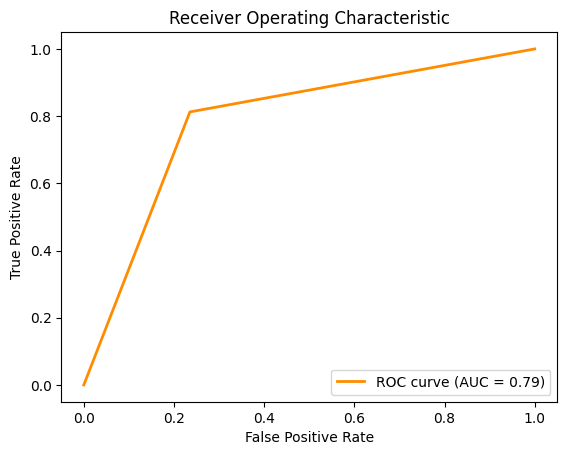

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test,predicted_labels)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,predicted_labels))
print('*'*50)
print(confusion_matrix(y_test,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        14
         1.0       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

**************************************************
[[14  0]
 [ 1 10]]


In [ ]:
label_map = {
    0: 'Autism child',
    1: 'typical child'
}

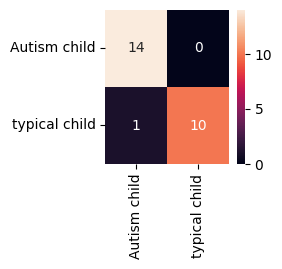

In [ ]:
plt.figure(figsize=(2,2))
conf_matrix = confusion_matrix(y_test,predicted_labels)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()

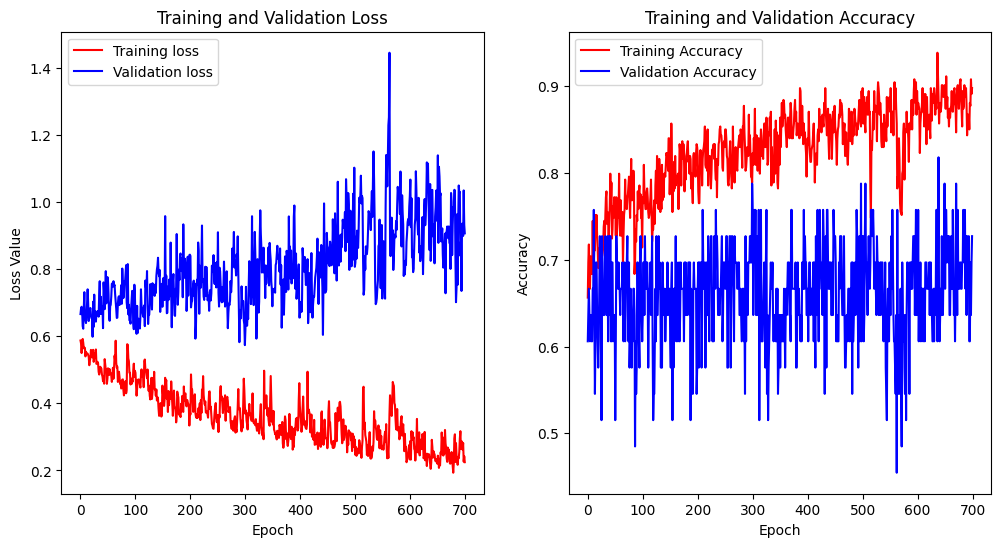

In [58]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()